__Как правильно писать логи в приложении. Знакомство с модулем logging в Python__

In [2]:
def do_something():
    print("Prepare to do somethinh")
    print("Doing something")
    print("Done doing someting")

def main():
    print("Hello! Starting main")
    do_something()
    print("Bye! Finished main")
    

if __name__ == "__main__":
    main()

Hello! Starting main
Prepare to do somethinh
Doing something
Done doing someting
Bye! Finished main


Проблема логов через принты в том, что ими сложно управлять и с этим сложно работать, ограниченный функционал.
Минусы print:
1) нет общего формата (дата)
2) не ясно какой модуль в каком месте написал информацию, насколько она важна
3) нужно выключать/включать, обязательно забудем удалить
4) нельзя гибко настроить куда писать (файл/консоль)


Уровни логгирования:

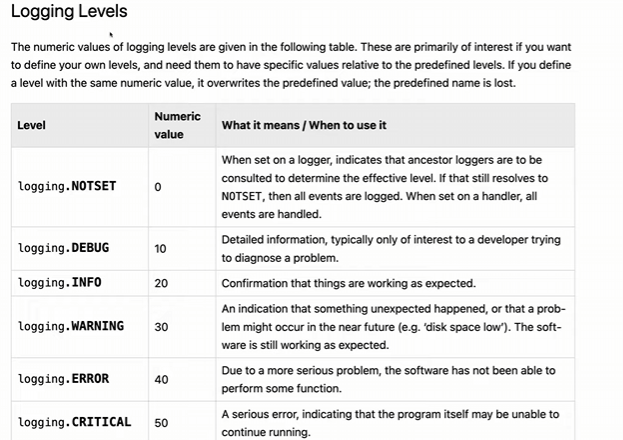

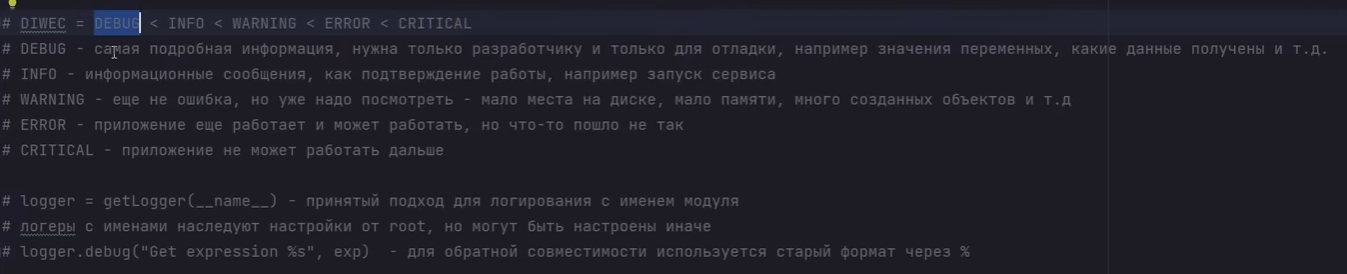

Логгер состоит из

1) Самого объекта логгера:

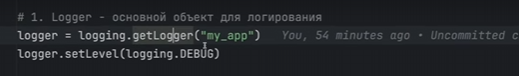

Мы можем импортировать логгеры по их имени

setLevel устанавливает уровни

2) Handler - объекты, которые отвечают за управление и работой логов

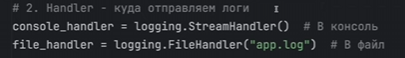

3) Formatter - устанвливает формат логов

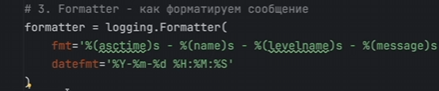

4) Filter - фильтруют сообщения (опционально)

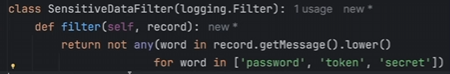

Фильтр используется если есть секретная информация, чтоб не выводить её

Ну и все соединяем:

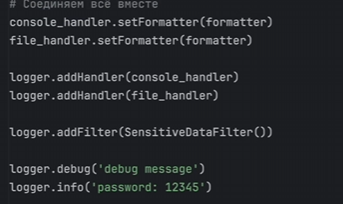

Общая схема:

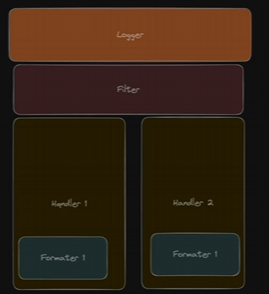

In [3]:
import logging

logger = logging.getLogger()

def do_something():
    logger.debug("Prepare to do something")
    logger.debug("Doing something")
    logger.info("Done doing something")

def main():
    logging.basicConfig(level=logging.INFO)
    logger.warning("Hello! Starting main")
    do_something()
    logger.warning("Bye! Finished main")
    

if __name__ == "__main__":
    main() 

INFO:root:Done doing something


Логгеры следует именовать или именем функции, где они вызываются, или по своему через ""

In [ ]:
logger = logging.getLogger(__name__)
logger = logging.getLogger("__name__")

Уровень level указывается для пометки минимального уровня, от которого начинаются выводиться логи

Пример создания конфигуратора логгера:

In [ ]:
def configure_logging(level=logging.INFO):
    logging.basicConfig(
        level=level, 
        datefmt="%Y-%m-%d %H:%M:%S",
        filename='logs.txt'
        format="[%(asctime)s.%(msecs)03d] %(module)s:%(lineno)d %(levelname)s - %(message)s",
    )

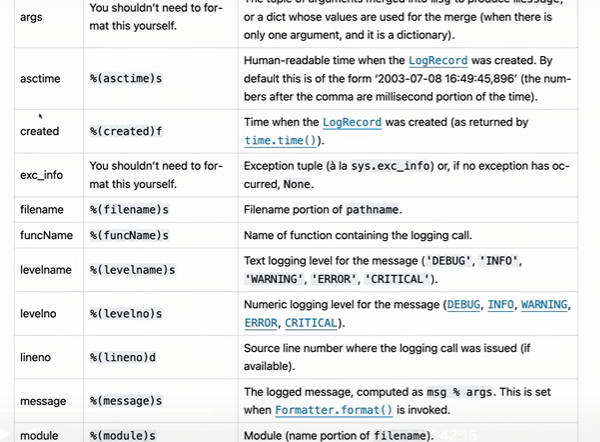

Можно конфигурировать удобные выводы логов для себя через процентное форматирование:

In [ ]:
format="[%(asctime)s.%(msecs)03d] %(module)-10s:%(lineno)-3d %(levelname)-7s - %(message)s"

строчный подход не очень хорош тем, что тратит много времени и мешает группировке:

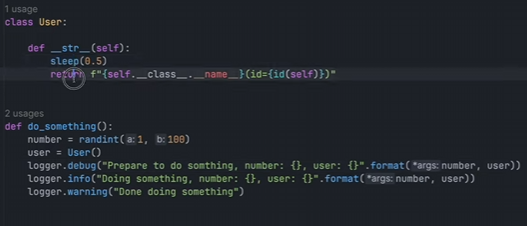

Лучше использовать процентное форматирование

Первый аргумент в логгере должа быть всегда строчка

Также можно обрабатывать с условием, например у нас есть затратная функция и мы не хотим ее выводить при INGO логгинге:

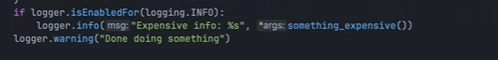

Манипуляции с ограниченным выводом (допустим 2 цифры после запятой и т.п) лучше делать в строчку messagfe через процентное форматирование, а не через другие аргументы:

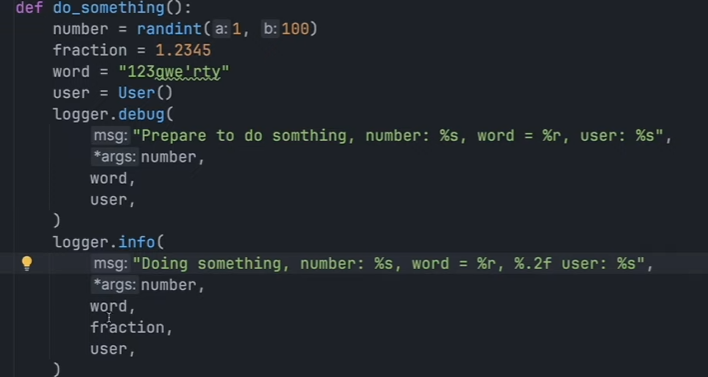

Можно самим кастомизировать логгеры и форматы:

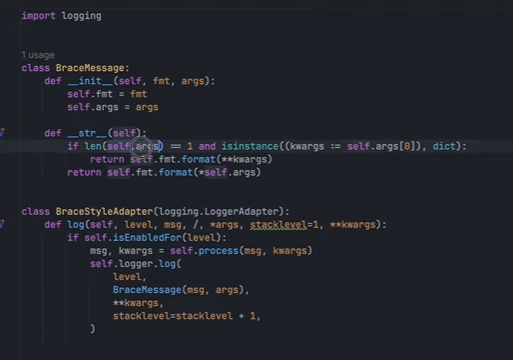

Так можно логгировать исключения:

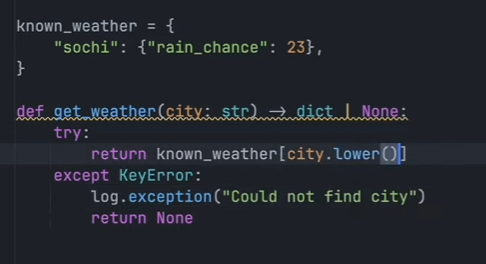

Правильный подход:

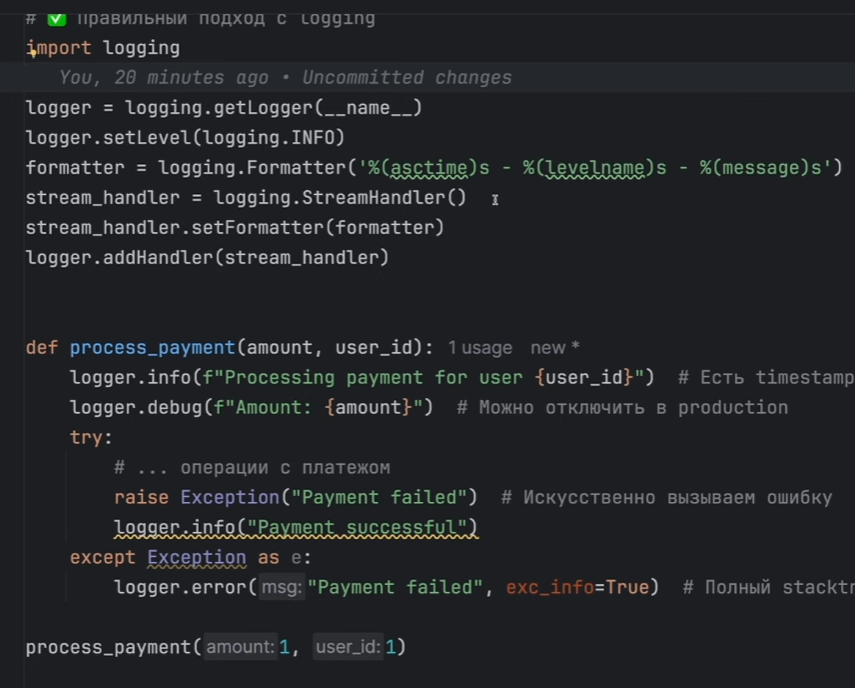

Логгер можно сконфигурировать с помощью словарика:

1) Создаем словарик

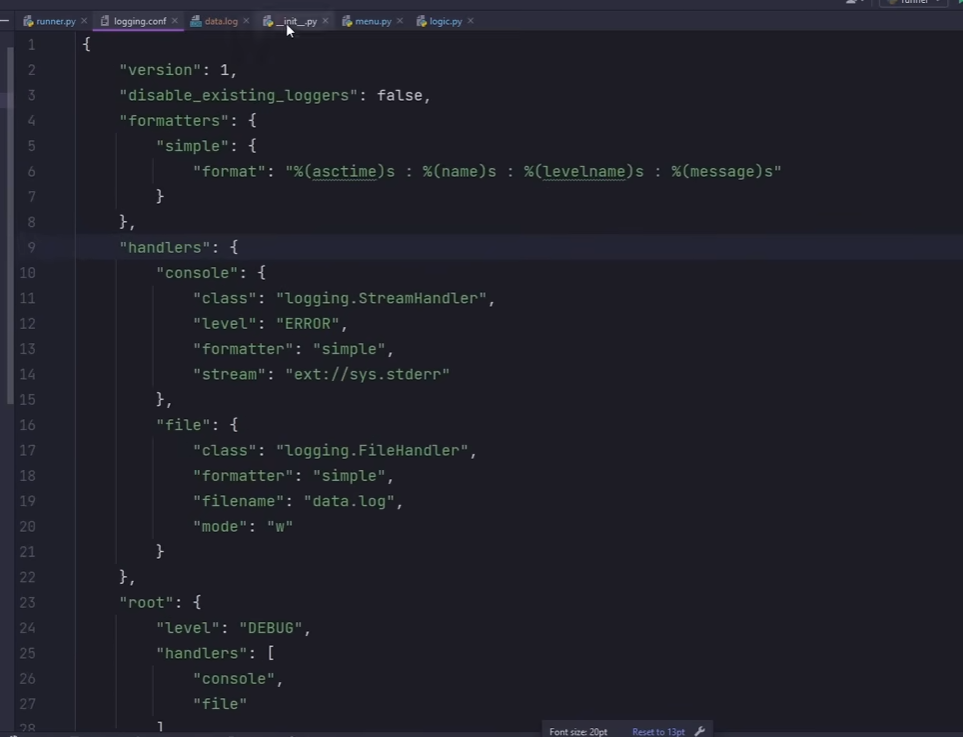

2) Читаем его и регаем

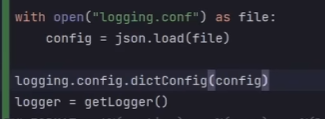
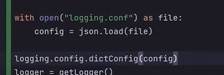